In [102]:
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models, regularizers
from sklearn.model_selection import train_test_split



import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [103]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [106]:
X_train = np.empty((0, 32*32*3), int)
y_train = np.empty((0, 10), int)


for i in range(1, 6):
    raw_data = unpickle(f'../data/data_batch_{i}')
    X_tmp = raw_data[b'data']
    y_tmp = np.array(raw_data[b'labels'])
    X_train = np.append(X_train, X_tmp, axis=0)
    y_train = np.append(y_train, y_tmp)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

X_train = np.reshape(X_train, (-1, 32, 32, 3), order='F').transpose(0, 2, 1, 3)
X_validation = np.reshape(X_validation, (-1, 32, 32, 3), order='F').transpose(0, 2, 1, 3)

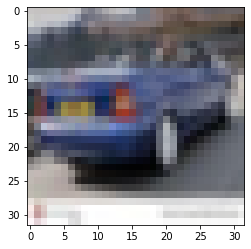

In [107]:
plt.imshow(X_train[1])

In [108]:
image_generator = ImageDataGenerator(featurewise_center=True,
                                     rotation_range=30,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     zoom_range=0.1,
                                     brightness_range=(0.9, 1.1))

In [109]:
image_generator.fit(X_train)

In [116]:
train_generator = image_generator.flow(X_train, y_train, batch_size=64)
test_generator = image_generator.flow(X_validation, y_validation, batch_size=64)

In [117]:
import tensorflow as tf
from tensorflow import keras

In [118]:
simple_cnn = keras.Sequential()

In [119]:
simple_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
simple_cnn.add(layers.MaxPooling2D((2, 2)))
simple_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
simple_cnn.add(layers.MaxPooling2D((2, 2)))
simple_cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_cnn.add(layers.Flatten())
simple_cnn.add(layers.Dense(64, activation='relu'))
simple_cnn.add(layers.Dense(64, activation='relu'))
simple_cnn.add(layers.Dense(10))

In [ ]:
simple_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

simple_cnn.fit_generator(train_generator,
                    steps_per_epoch=1024,
                    epochs=5,
                    validation_data=test_generator,
                    validation_steps=800)

Epoch 1/5
1024/1024 [==============================] - 229s 223ms/step - loss: 1.5357 - accuracy: 0.4366 - val_loss: 1.3806 - val_accuracy: 0.4953
Epoch 2/5
1024/1024 [==============================] - 246s 240ms/step - loss: 1.3067 - accuracy: 0.5330 - val_loss: 1.2684 - val_accuracy: 0.5433
Epoch 3/5
1024/1024 [==============================] - 232s 226ms/step - loss: 1.1881 - accuracy: 0.5808 - val_loss: 1.2002 - val_accuracy: 0.5754
Epoch 4/5
1024/1024 [==============================] - 223s 218ms/step - loss: 1.1219 - accuracy: 0.6093 - val_loss: 1.1253 - val_accuracy: 0.6003
Epoch 5/5
 172/1024 [====>.........................] - ETA: 2:21 - loss: 1.1164 - accuracy: 0.6130